(unsupervised:distribution-clustering)=
# Distribution-based Clustering

In distribution-based clustering each cluster $1,\ldots,k$ is represented by a probability distribution. The underlying assumption is that there exist $k$ probability distributions $p_1,\ldots,p_k$ from which each cluster's data points have been drawn. Given training data one aims to find the probability distribution for each cluster. Usually Gaussian distributions are used, but others may be appropriate as well.

The difficulty is to derive (for fixed $k$) the distribution parameters from the data set and, thus, cluster positions, sizes, shapes. Resulting model of the data set is denoted as a *mixture model* because the data set is represented as a mixture of points drawn from different distributions. In case of Gaussian distributions the searched for parameters are the $k$ mean vectors and the $k$ covariance matrices. Resulting model then is a *Gaussian mixture model*.

Mixture models are an example of *generative models*, because they allow to generate new samples with similar properties like samples in the training set. Here we do not obtain a model of the training set's clusters themselves, but a model to generate data sets similar to the training set. From this generative model we may extract information about clusters in the training data (distribution parameters), but partitioning of training samples into concrete clusters is an extra step based on information extracted from the model.

Related projects:
* [](projects:mnist:generate-digits)

## Expectation-Maximization

On the one hand we want to find parameters of the $k$ underlying distributions such that the distributions fit well to the data. On the other hand we want to label training samples (assign them to clusters). The questions are how to formalize 'fits well' and how to derive the labels. A common approach is to choose parameters and labels such that the training set is the most probable data set within all data sets which can be drawn from distributions with the chosen parameters respecting the cluster assignments. This approach (and its algorithmic realization below) is known as *expectation-maximization (EM)*.

### Notation

The EM approach requires that we consider training samples $x_1,\ldots,x_n$ and labels as realizations of random variables $X_1,\ldots,X_n$ and $Y_1,\ldots,Y_n$, respectively. The $X_l$ are continuous random variables with values in $\mathbb{R}^m$. The $Y_l$ are discrete random variable taking values in $\{1,\ldots,k\}$.

Clusters $1,\ldots,k$ are described by probability densities $p_i:\mathbb{R}^m\rightarrow[0,\infty)$, $i=1,\ldots,k$ containing parameters $\vartheta_1,\ldots,\vartheta_k$, respectively. Here, $\vartheta_i$ is a vector if the $i$th density has more than one parameter. If we know the cluster of some sample $l$, that is, $Y_l=y_l$ for some $y_l\in\{1,\ldots,k\}$, then we know the distribution of the $l$th sample: it's $p_{y_l}$. In other words, the densities $p_i$ are our model for describing generation of random samples given preset cluster assignments.

Note that for continuous random variables working with probability densities is much more comfortable than working with the probability measures directly, because $P(X=x)=0$ for each $x$, whereas $p(x)$ carries the relevant information as long os $p$ is continuous, which is usually taken for granted when working with densities without explicitly mentioning this important assumption.

For the $Y_l$ we do not specify a model. The $Y_l$ are discrete random variables taking $k$ different values. Thus, the distribution of each $Y_l$ can be described by $k$ non-negative numbers:
\begin{equation*}
q_{l,1}:=P(Y_l=1),\quad\ldots,\quad q_{l,k}:=P(Y_l=k)\qquad\text{for $l=1,\ldots,n$}.
\end{equation*}
The $q_{l,i}$ describe the generation of random cluster assignments for all samples. By definition they satisfy
\begin{equation*}
\sum_{i=1}^k q_{l,i}=1\qquad\text{for $l=1,\ldots,n$}.
\end{equation*}

### Maximization Problem

The aim is to choose all parameters describing the generation of random samples (that is, the $\vartheta_i$ and the $q_{l,i}$) in such a way that the probability to observe the available training data becomes maximal with respect to all possible parameter values:
\begin{equation*}
p(x_1,\ldots,x_n)\to\max_{\vartheta_1,\ldots,\vartheta_k,q_{1,1},\ldots,q_{n,k}}.
\end{equation*}
Here, $p$ is the probability density function of $(X_1,\ldots,X_n)$.

The structure of $p$ is quite involved and corresponding maximization problem hard to solve, analytically as well as numerically.

### Idea of EM Algorithm

Solving the maximization problem with respect to all parameters is almost impossible. But if we fix the $q_{l,i}$ to certain special but still reasonable values then optimal $\vartheta_1,\ldots,\vartheta_k$ can be obtained in a straight-forward way. The other way round, if we fix $\vartheta_1,\ldots,\vartheta_k$, then calculating optimal $q_{l,i}$ becomes viable.

We may alternate both steps: Fix (initial, almost random) $q_{l,i}$ and get optimal $\vartheta_i$. Then for those $\vartheta_i$ get optimal $q_{l,i}$ and so on until some stopping criterion is satisfied.

### Optimal Labels

Given some fixed values for $\vartheta_1,\ldots,\vartheta_k$ we want so solve above maximization problem with respect to the $q_{l,i}$.

The law of total probability allows to rewrite $p$ as
\begin{equation*}
p(x_1,\ldots,x_n)=\sum_{y_1=1}^k\cdots\sum_{y_n=1}^k P(y_1,\ldots,y_n)\,p(x_1,\ldots,x_n\,\vert\,y_1,\ldots,y_n),
\end{equation*}
where $p(x_1,\ldots,x_n\,\vert\,y_1,\ldots,y_n)$ is the conditional probability density for $(X_1,\ldots,X_n)$ given conrete values $y_1,\ldots,y_n$ for $Y_1,\ldots,Y_n$.

```{admonition} Mathematical side note
The somewhat unsual mix of densities and probability measure $P$ is mathematically correct. This can be seen by considering a subset $A$ of $\mathbb{R}^m$ instead of only one element, allowing to write everything without densities:
\begin{equation*}
P(A)=\sum\cdots\sum P(y_1,\ldots,y_n)\,P(A\,\vert\,y_1,\ldots,y_n).
\end{equation*}
Replacing $P$ by integrals over corresponding densities we obtain
\begin{align*}
\int\limits_A p(x_1,\ldots,x_n)\,\mathrm{d}(x_1,\ldots,x_n)
&=\sum\cdots\sum P(y_1,\ldots,y_n)\,\int\limits_A p(x_1,\ldots,x_n\,\vert\,y_1,\ldots,y_n)\,\mathrm{d}(x_1,\ldots,x_n)\\
&=\int\limits_A\sum\cdots\sum P(y_1,\ldots,y_n)\,p(x_1,\ldots,x_n\,\vert\,y_1,\ldots,y_n)\,\mathrm{d}(x_1,\ldots,x_n).
\end{align*}
This integral equation holds for all sets $A$. Thus, integrants on both sides are equal.
```

Remember
\begin{equation*}
P(y_1,\ldots,y_n)=q_{1,y_1}\cdots q_{n,y_n}
\end{equation*}
by definition of the $q_{l,i}$.
The conditional density may be rewritten in terms of conditional densities for each sample (we reuse $p$ here although joint and per-sample densities are different functions):
\begin{equation*}
p(x_1,\ldots,x_n\,\vert\,y_1,\ldots,y_n)=p(x_1\,\vert\,y_1,\ldots,y_n)\cdots p(x_n\,\vert\,y_1,\ldots,y_n).
\end{equation*}
The distribution of $X_l$ only depends on $Y_l$, not on $Y_\lambda$ for $\lambda\neq l$. Thus,
\begin{equation*}
p(x_l\,\vert\,y_1,\ldots,y_n)=p(x_l\,\vert\,y_l).
\end{equation*}
The value $p(x_l\,\vert\,y_l)$ is the probability of observing $x_l$ if we know that $x_l$ belongs to cluster $y_l$. With the cluster densities $p_1,\ldots,p_k$ we thus have
\begin{equation*}
p(x_l\,\vert\,y_1,\ldots,y_n)=p_{y_l}(x_l)
\end{equation*}

The maximization problem to solve now reads
\begin{equation*}
\sum_{y_1=1}^k\cdots\sum_{y_n=1}^k q_{1,y_1}\cdots q_{n,y_n}\,p_{y_1}(x_1)\cdots p_{y_n}(x_n)\to\max_{q_{1,1},\ldots,q_{n,k}}.
\end{equation*}

From the properties of the $q_{l,i}$ (non-negative, sum over $i$ is $1$) we immediately see that $q_{1,y_1}\cdots q_{n,y_n}\geq 0$ for each $(y_1,\ldots,y_n)$ and
\begin{equation*}
\sum_{y_1=1}^k\cdots\sum_{y_n=1}^k q_{1,y_1}\cdots q_{n,y_n}=1.
\end{equation*}
Thus, our maximization problem has the structure
\begin{equation*}
\sum_j a_j\,z_j\to\max_{a_j},\qquad a_j\geq 0,\qquad\sum_j a_j=1.
\end{equation*}
The solution of such problems is known (and easily verified) to be $a=(0,\ldots,0,1,0,\ldots,0)$ with the $1$ at the position of the maximal $z_j$.

In our setting: Let $y_1^\ast,\ldots,y_n^\ast$ be the set of labels maximizing $p_{y_1}(x_1)\cdots p_{y_n}(x_n)$. Then $q_{1,y_1^\ast}\cdots q_{n,y_n^\ast}$ has to be $1$ (which is only possible if all $q_{l,y_l^\ast}$ equal $1$) and all other $q_{l,i}$ have to be $0$. In other words, the optimal distribution of $(Y_1,\ldots,Y_n)$ is deterministic with the whole probability mass on $(Y_1,\ldots,Y_n)=(y_1^\ast,\ldots,y_n^\ast)$.
Note that $p_{y_1}(x_1)\cdots p_{y_n}(x_n)$ becomes maximal if each factor becomes maximal. Thus,
\begin{equation*}
y_l^\ast=\mathrm{argmax}_i\,p_i(x_l)\qquad\text{for $l=1,\ldots,n$}.
\end{equation*}

### Optimal Per-Cluster Distributions

Given fixed $q_{l,i}$ we want to solve the above maximization problem with respect to the parameters $\vartheta_1,\ldots,\vartheta_k$ of the per-cluster probability densities $p_1,\ldots,p_k$. We do not solve the maximization problem for arbitraty $q_{l,i}$ but for $q_{l,i}$ with the structure obtained as optimal solution in the previous subsection. That is, the $q_{l,i}$ describe a deterministic probability distribution with all mass on some fixed $(y_1,\ldots,y_n)$.

Given the concrete set of labels $y_1,\ldots,y_n$ the probability to observe our training samples $x_1,\ldots,x_n$ (that is, the objective of the maximization problem) is
\begin{equation*}
p(x_1,\ldots,x_n)=\prod_{l=1}^n p_{y_l}(x_l)=\prod_{i=1}^k\prod_{l:y_l=i}p_i(x_l).
\end{equation*}
Each factor $\prod_{l:y_l=i}p_i(x_l)$ only depends on $\vartheta_i$ and not on $\vartheta_j$ for $j\neq i$. Thus, we may maximize factors independently.

Finding $\vartheta_i$ which maximizes $\prod_{l:y_l=i}p_i(x_l)$ is a standard task in [maximum likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation). Depending on the structure of $p_i$ there exist explicit solutions (see below for Gaussion densities).

## The EM Algorithm

The procedure derived above can be summarized as follows:
1. Randomly choose initial labels $y_1,\ldots,y_n$.
2. Calculate optimal $\vartheta_1,\ldots,\vartheta_k$ based on the training samples in each cluster.
3. Update labels by assigning each $x_l$ the cluster $i$ with the highest $p_i(x_l)$.
4. Go to 2 if stopping criterion not satisfied.

Common stopping criteria are to stop if the $y_l$ or the $\vartheta_i$ do not change anymore.

The process is known to converge to a stationary point (gradient is zero) of the original maximization problem. Thus, it may get stuck in local maxima or even in saddle points.

## Gaussian Mixtures

If $p_1,\ldots,p_k$ are Gaussian probability densities, $p_i$ has the mean vector and the covariance matrix as parameters.
The products
\begin{equation*}
\prod_{l:y_l=i}p_i(x_l),\qquad i=1,\ldots,k
\end{equation*}
in the above derivation are maximized with respect to the distribution parameters, if we choose mean and covariance of
\begin{equation*}
\{x_l:\,y_l=i\}\qquad\text{(cluster $i$)}
\end{equation*}
as parameters.

EM with Gaussian distributions is a very fast algorithm. The two alternating steps boil down to:
* calculate probabilities $p_{l,i}:=p_i(x_l)$ for all pairs of samples and clusters,
* for each $l$ set $y_l:=\mathrm{argmax}_{i=1,\ldots,k}p_{l,i}$,
* calculate empirical mean vectors and empirical covariance matrices for each cluster.

## Relation to $k$-Means

The idea of alternating two steps, each solving the problem partially, is very similar to $k$-means:
* EM: for fixed labels get optimal parameters.  
  $k$-means: for fixed labels get centroid of each cluster.
* EM: for fixed parameters get optimal labels.  
  $k$-means: for fixed centroids get optimal labels.

One easily verifies that the training of Gaussian mixture models with identity covariance matrices is equivalent to $k$-means clustering.

## Choosing $k$

Like for $k$-means the number of clusters has to be known in advance. The larger $k$, the better the data can be represented by the model, but interpretation of clusters becomes more difficult (overfitting).

Silhouette score and Davies-Bouldin index may help choosing $k$. For elbow method one can use the optimal value of the objective function from the above maximization problem. Another approach is known as *Bayesian information criterion*. Here one chooses $k$ to minimize
\begin{equation*}
t\,\log n-\log p(x_1,\ldots,x_n).
\end{equation*}
The second summand is the negative logarithm of the optimal value of the original maximization problem and the first summand is a penalty containing the number $t$ of model parameters. Obviously, $t$ is a multiple of $k$ if all $k$ distributions are of equal type (e.g., Gaussian). The more clusters the model has, the higher $t$ and the larger the penalty.
Minimizing the sum yields a value for $k$ which is a compromise between number of clusters and fitting error. For more detailed motivation of BIC see [Wikipedia on BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion).

## Soft Clustering

EM allows for soft clustering, that is, each sample we may assign probabilities to belong to the different clusters. The $p_i(x_l)$ can be interpreted as score for $x_l$ to belong to cluster $i$. Probability-like scores can be obtained the usual way as
\begin{equation*}
\frac{p_i(x_l)}{p_1(x_l)+\cdots+p_k(x_l)}.
\end{equation*}

## Gaussian Mixture Models with Scikit-Learn

Scikit-Learn provides the [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) class in its `mixture` module. The only relevant parameter is `n_components` (our $k$).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn.mixture as mixture
import sklearn.metrics as metrics

rng = np.random.default_rng(0)

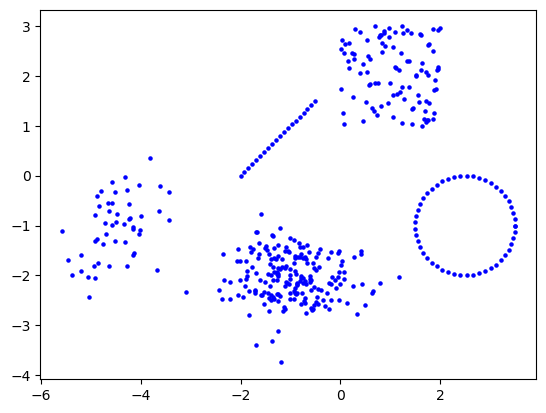

In [2]:
# 5 clusters in 2 dimensions

n1, n2, n3, n4, n5 = 100, 200, 20, 50, 50
n = n1 + n2 + n3 + n4 + n5

X1 = rng.uniform((0, 1), (2, 3), (n1, 2))
X2 = rng.multivariate_normal((-1, -2), ((0.5, 0), (0, 0.2)), n2)
X3 = np.linspace(-1, 0.5, n3).reshape(-1, 1) * np.ones((1, 2)) + np.array([[-1, 1]])
X4 = rng.multivariate_normal((-4.5, -1), ((0.2, 0.1), (0.1, 0.4)), n4)
phi = np.linspace(0, 2 * np.pi, n5).reshape(-1, 1)
X5 = np.array([[2.5, -1]]) + np.concatenate((np.cos(phi), np.sin(phi)), axis=1)

X = np.concatenate((X1, X2, X3, X4, X5))

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], s=5, c='b')
ax.axis('equal')
plt.show()

2
3
4
5
6
7
8
9


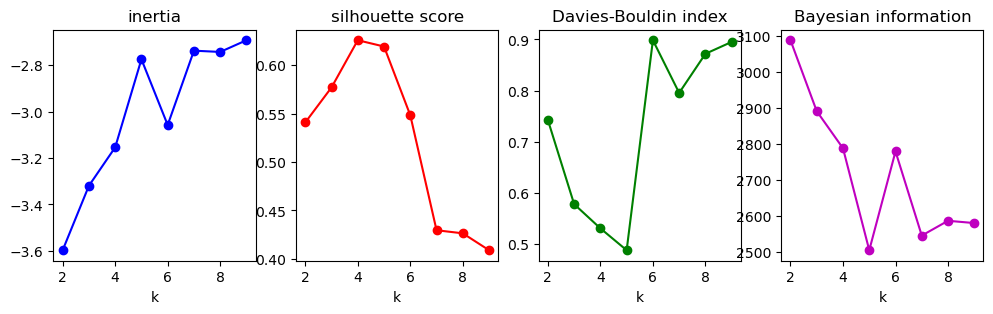

In [3]:
ks = range(2, 10)

obj = []
sil = []
db = []
bic = []
for k in ks:

    print(k)

    gm = mixture.GaussianMixture(n_components=k)
    gm.fit(X)

    labels = gm.predict(X)
    obj.append(gm.lower_bound_)
    sil.append(metrics.silhouette_score(X, labels))
    db.append(metrics.davies_bouldin_score(X, labels))
    bic.append(gm.bic(X))

obj = np.array(obj)
sil = np.array(sil)
db = np.array(db)
bic = np.array(bic)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 3))
ax1.plot(ks, obj, '-ob')
ax2.plot(ks, sil, '-or')
ax3.plot(ks, db, '-og')
ax4.plot(ks, bic, '-om')
ax1.set_xlabel('k')
ax2.set_xlabel('k')
ax3.set_xlabel('k')
ax4.set_xlabel('k')
ax1.set_title('inertia')
ax2.set_title('silhouette score')
ax3.set_title('Davies-Bouldin index')
ax4.set_title('Bayesian information')
plt.show()

In [4]:
import matplotlib as mpl

In [5]:
k = 5

gm = mixture.GaussianMixture(k)
gm.fit(X)

colors = list(mpl.colors.TABLEAU_COLORS.values())

fig, ax = plt.subplots(figsize=(12, 8))

for label in range(0, k):
    mean = gm.means_[label, :]
    cov = gm.covariances_[label, :, :]
    
    # do some calculations for drawing an ellipse
    evals, evecs = np.linalg.eigh(cov)
    if evecs[0, 0] == 0:
        angle = 0.5 * np.pi
    else:
        angle = np.arctan(evecs[1, 0] / evecs[0, 0])

    # draw ellipses (level sets of Gaussian density)
    for fac in range(1, 10):
        ell = mpl.patches.Ellipse(mean, fac * evals[0], fac * evals[1], angle=angle / np.pi * 180,
                                  color=colors[label] + '10')
        ax.add_artist(ell)

    # plot cluster
    labels = gm.predict(X)
    mask = labels == label
    ax.scatter(X[mask, 0], X[mask, 1], s=5, c=colors[label])
    
ax.axis('equal')
plt.show()